In [7]:
%autosave 0

Autosave disabled


We are going to skip the hard way because we are lazy programmers!

It's there as a resource to understand how the correlation coefficient is calculated.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data



Let's do an example from the mpg dataset.

In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [11]:
mpg.cyl.value_counts()
#could i correlation test with this field?
#you need more to have a continuous type in order to run correlation test
#just because its a numerical type, you can't ram it into a correlation test
#"is this a truly continuous field in the data set"

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

#city and highway mpg are certainly are floats so it can be treated as continuous for correlation testing
#every good stats test needs a visual

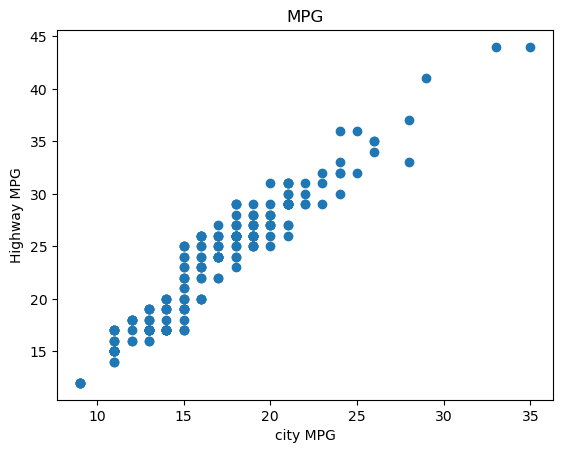

In [15]:
plt.scatter(mpg.cty, mpg.hwy)
plt.xlabel('city MPG')
plt.ylabel('Highway MPG')
plt.title('MPG')
plt.show()

In [18]:
r, p = stats.pearsonr(mpg.cty, mpg.hwy)
r , p    #this should be express as a tuple

(0.9559159136495713, 1.8683071952666785e-125)

the r-value of 0.96 indicates there is a strong, positive correlation between city and highway MPG

In [20]:
def eval_result(p_value, a=0.05):
    if p_value < a:
        print('Cool beans! Your result is significant!')
    else:
        print('Your result was not significant!')

In [21]:
eval_result(p)

Cool beans! Your result is significant!


Let's look at a limitation of the Pearson's r test with a non-linear relationship.

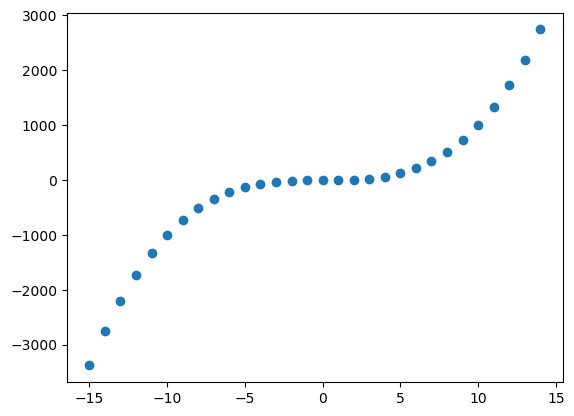

In [24]:
x = list(range(-15,15,1))  #from -15 to 15 increment of 1
# y = x ** 2 you cannot do this 
y = [i ** 3 for i in x] #we are looking at each element inside the list 
plt.scatter(x,y)

you can see from this plot, there is a definite relationship between x and y

it is not being defined by a straight line

In [26]:
#i will run a pearson r on it 
r_cubed, p_cubed = stats.pearsonr(x, y)
eval_result(p_cubed)

Cool beans! Your result is significant!


In [27]:
r_cubed

0.915178278514944

In [32]:
#squaring it instead of cubing it 
x_square = list(range(-15,15, 1))
y_square = [i ** 2 for i in x]

In [31]:
r_sq, p_sq = stats.pearsonr(x_square, y_square)
eval_result(p_sq)

Your result was not significant!


Let's look at another limitation with a linear relationship that doesn't do much.

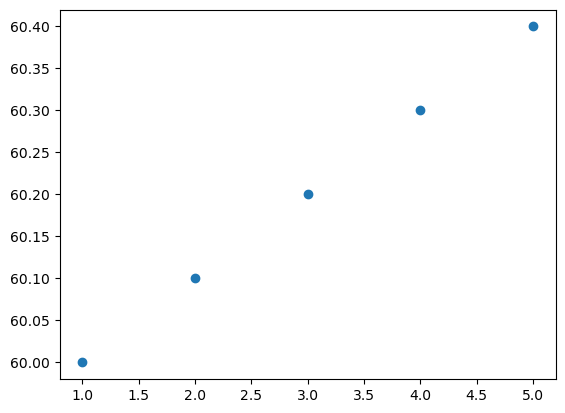

In [36]:
# we have to define something that doesn't do a lot
x_not = [1,2,3,4,5]
y_not = [60, 60.1,60.2,60.3,60.4]

plt.scatter(x_not, y_not)


(0.0, 75.0)

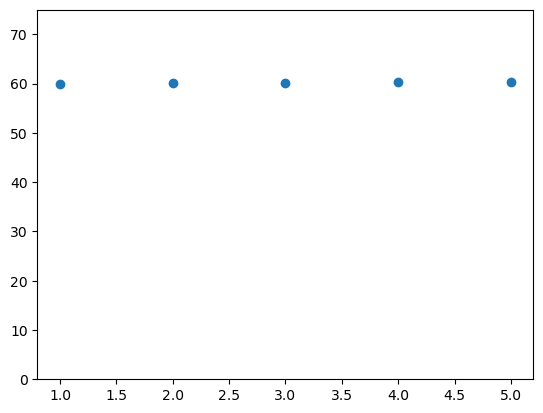

In [38]:
x_not = [1,2,3,4,5]
y_not = [60, 60.1,60.2,60.3,60.4]

plt.scatter(x_not, y_not)
plt.ylim(0,75)
#making a chart less deceptive and honest with finding

In [39]:
r_not, p_not = stats.pearsonr(x_not, y_not)
eval_result(p_not)
# this means as times goes by, nothing changes. it doesn't correlated with the result

Cool beans! Your result is significant!


In [40]:
r_not   #this is a deceptive result 

0.9999999999999999

ultimately this could be a useful plot but it is a flatline that doesn't tell a story 

#one more concept
BONUS! super useful for next week

In [50]:
#making another function 
def find_correlation(feature_one, feature_two):
    r, p = stats.pearsonr(feature_one, feature_two)
    eval_result(p)   #calling other function onto this function
    

In [51]:
find_correlation(x_not, y_not)

Cool beans! Your result is significant!
